In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

path_to_file = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-sedelkin/practice/data/miniproject_5/transaction_data.csv'
transaction_data = pd.read_csv(path_to_file)
transaction_data

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled
...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull


In [6]:
transaction_data.isna().sum()

date           0
name           0
transaction    0
dtype: int64

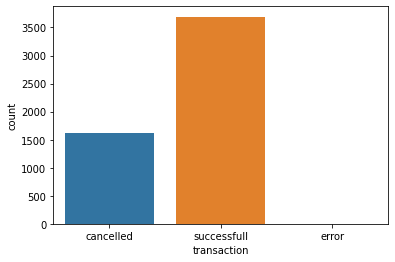

In [12]:
# Проверьте, какие значения принимает колонка transaction . Сколько наблюдений относятся к тому или иному уровню? 
# Визуализируйте результат с помощью барплота.

sns.countplot(x='transaction', data=transaction_data)

In [14]:
# Сколько произошло ошибок? 
transaction_data.query('transaction == "error"').transaction.count()

4

In [23]:
# Сколько транзакций осуществил каждый из пользователей? 
# Осуществлёнными считаются транзакции со значением successfull

# Посмотрите на характеристики распределения, а затем постройте гистограмму числа успешных транзакций, совершённых каждым пользователем, где

#     по оси x – число транзакций
#     по оси y – доля пользователей с таким числом транзакций

transactions_by_name = transaction_data[transaction_data.transaction == 'successfull'] \
    .groupby('name', as_index =False) \
    .agg({'transaction': 'count'})

transactions_by_name.describe()

,transaction
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


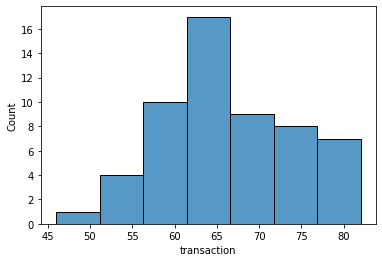

In [28]:
sns.histplot(data=transactions_by_name, x='transaction')

In [51]:
path_to_updated_file = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-sedelkin/practice/data/miniproject_5/transaction_data_updated.csv'
df = pd.read_csv(path_to_updated_file)


In [72]:
df_user_by_minute = df.groupby(['name', 'minute'], as_index=False).agg({'transaction': 'count'})
user_vs_minute_pivot = df_user_by_minute.pivot(index='minute', columns='name', values='transaction').fillna(0)

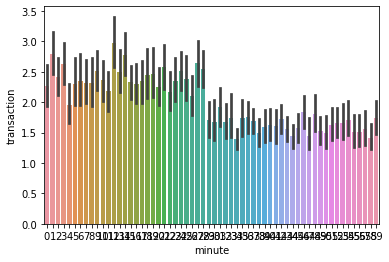

In [74]:
sns.barplot(x='minute', y ='transaction', data=df_user_by_minute)

In [45]:
??sns.countplot

In [48]:
df

,name,minute,transaction
0,Ekaterina_Fedorova,0,3
1,Ekaterina_Fedorova,1,4
2,Ekaterina_Fedorova,2,1
3,Ekaterina_Fedorova,3,3
4,Ekaterina_Fedorova,4,3
...,...,...,...
2573,Vasilisa_Smirnova,52,1
2574,Vasilisa_Smirnova,53,1
2575,Vasilisa_Smirnova,54,2
2576,Vasilisa_Smirnova,56,3


In [62]:
df['true_minute'] = pd.to_datetime(df['date']).dt.minute + pd.to_datetime(df['date']).dt.hour * 60

In [66]:
df_user_by_true_minute = df.groupby(['name', 'true_minute'], as_index=False).agg({'transaction': 'count'})
user_vs_minute_pivot = df_user_by_true_minute.pivot(index='true_minute', columns='name', values='transaction').fillna(0)

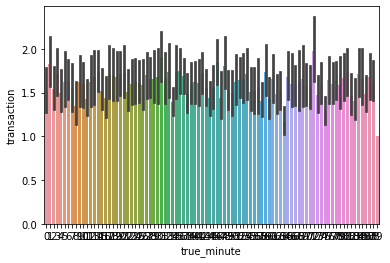

In [70]:
sns.barplot(x='true_minute', y ='transaction', data=df_user_by_true_minute)